## Predicting earning manipulation using Beneish -M model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
manipulator_pred = pd.read_csv('D:/Sem_2/Finansial Analysis/Assignment/Model development dataset.csv')
manipulator_pred

,Company ID,DSRI,GMI,AQI,SGI,DEPI,SGAI,ACCR,LEVI,Manipulator,C-MANIPULATOR
0,1.0,1.624742,1.128927,7.185053,0.366211,1.381519,1.624145,-0.166809,1.161082,Yes,1.0
1,2.0,1.000000,1.606492,1.004988,13.081433,0.400000,5.198207,0.060475,0.986732,Yes,1.0
2,3.0,1.000000,1.015607,1.241389,1.475018,1.169353,0.647671,0.036732,1.264305,Yes,1.0
3,4.0,1.486239,1.000000,0.465535,0.672840,2.000000,0.092890,0.273434,0.680975,Yes,1.0
4,5.0,1.000000,1.369038,0.637112,0.861346,1.454676,1.741460,0.123048,0.939047,Yes,1.0
...,...,...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Checking for null values
manipulator_pred.isna().sum()

Company ID       779
DSRI             779
GMI              779
AQI              779
SGI              779
DEPI             779
SGAI             779
ACCR             779
LEVI             779
Manipulator      779
C-MANIPULATOR    779
dtype: int64

In [4]:
#Removing the null values
manipulator_pred.dropna(inplace = True)

In [5]:
manipulator_pred

,Company ID,DSRI,GMI,AQI,SGI,DEPI,SGAI,ACCR,LEVI,Manipulator,C-MANIPULATOR
0,1.0,1.624742,1.128927,7.185053,0.366211,1.381519,1.624145,-0.166809,1.161082,Yes,1.0
1,2.0,1.000000,1.606492,1.004988,13.081433,0.400000,5.198207,0.060475,0.986732,Yes,1.0
2,3.0,1.000000,1.015607,1.241389,1.475018,1.169353,0.647671,0.036732,1.264305,Yes,1.0
3,4.0,1.486239,1.000000,0.465535,0.672840,2.000000,0.092890,0.273434,0.680975,Yes,1.0
4,5.0,1.000000,1.369038,0.637112,0.861346,1.454676,1.741460,0.123048,0.939047,Yes,1.0
...,...,...,...,...,...,...,...,...,...,...,...
215,216.0,1.002026,0.998118,-0.917605,1.088962,1.030527,1.076770,-0.001079,1.080009,No,0.0
216,217.0,0.909365,1.170298,1.971874,1.279013,0.971605,0.985939,-0.035854,1.025102,No,0.0
217,218.0,0.937403,0.973292,1.131131,1.083577,1.050011,0.959512,-0.095279,0.976332,No,0.0
218,219.0,1.044944,1.021424,4.437887,0.870790,1.026489,1.060493,-0.157146,0.916070,No,0.0


In [6]:
#Checking the datatypes of all the variables
manipulator_pred.dtypes

Company ID       float64
DSRI             float64
GMI              float64
AQI              float64
SGI              float64
DEPI             float64
SGAI             float64
ACCR             float64
LEVI             float64
Manipulator       object
C-MANIPULATOR    float64
dtype: object

In [7]:
#Converting the manipulator column into integer type
manipulator_pred['C-MANIPULATOR'] = manipulator_pred['C-MANIPULATOR'].astype(int)

In [8]:
manipulator_pred.dtypes

Company ID       float64
DSRI             float64
GMI              float64
AQI              float64
SGI              float64
DEPI             float64
SGAI             float64
ACCR             float64
LEVI             float64
Manipulator       object
C-MANIPULATOR      int32
dtype: object

In [9]:
#Removing columns which is not needed
manipulator_pred.drop('Manipulator', axis = 1, inplace = True)

In [10]:
manipulator_pred.head()

,Company ID,DSRI,GMI,AQI,SGI,DEPI,SGAI,ACCR,LEVI,C-MANIPULATOR
0,1.0,1.624742,1.128927,7.185053,0.366211,1.381519,1.624145,-0.166809,1.161082,1
1,2.0,1.000000,1.606492,1.004988,13.081433,0.400000,5.198207,0.060475,0.986732,1
2,3.0,1.000000,1.015607,1.241389,1.475018,1.169353,0.647671,0.036732,1.264305,1
3,4.0,1.486239,1.000000,0.465535,0.672840,2.000000,0.092890,0.273434,0.680975,1
4,5.0,1.000000,1.369038,0.637112,0.861346,1.454676,1.741460,0.123048,0.939047,1


In [11]:
X = manipulator_pred.drop('C-MANIPULATOR', axis = 1)
X

,Company ID,DSRI,GMI,AQI,SGI,DEPI,SGAI,ACCR,LEVI
0,1.0,1.624742,1.128927,7.185053,0.366211,1.381519,1.624145,-0.166809,1.161082
1,2.0,1.000000,1.606492,1.004988,13.081433,0.400000,5.198207,0.060475,0.986732
2,3.0,1.000000,1.015607,1.241389,1.475018,1.169353,0.647671,0.036732,1.264305
3,4.0,1.486239,1.000000,0.465535,0.672840,2.000000,0.092890,0.273434,0.680975
4,5.0,1.000000,1.369038,0.637112,0.861346,1.454676,1.741460,0.123048,0.939047
...,...,...,...,...,...,...,...,...,...
215,216.0,1.002026,0.998118,-0.917605,1.088962,1.030527,1.076770,-0.001079,1.080009
216,217.0,0.909365,1.170298,1.971874,1.279013,0.971605,0.985939,-0.035854,1.025102
217,218.0,0.937403,0.973292,1.131131,1.083577,1.050011,0.959512,-0.095279,0.976332
218,219.0,1.044944,1.021424,4.437887,0.870790,1.026489,1.060493,-0.157146,0.916070


In [12]:
y = manipulator_pred['C-MANIPULATOR']
y

0      1
1      1
2      1
3      1
4      1
      ..
215    0
216    0
217    0
218    0
219    0
Name: C-MANIPULATOR, Length: 220, dtype: int32

In [13]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [177]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=45)
X_res,y_res=smk.fit_resample(X,y)

In [178]:
X_res.shape,y_res.shape

((360, 9), (360,))

In [179]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 181, 1: 39})
Resampled dataset shape Counter({1: 180, 0: 180})


In [180]:
from imblearn.over_sampling import RandomOverSampler

In [265]:
os =  RandomOverSampler(sampling_strategy=0.4)

In [266]:
X_train_res, y_train_res = os.fit_resample(X, y)

In [267]:
X_train_res.shape,y_train_res.shape

((253, 9), (253,))

In [268]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({0: 181, 1: 39})
Resampled dataset shape Counter({0: 181, 1: 72})


In [269]:
# In this example I use SMOTETomek which is a method of imblearn. SMOTETomek is a hybrid method
# which uses an under sampling method (Tomek) in with an over sampling method (SMOTE).
os_us = SMOTETomek(sampling_strategy=0.4)

X_train_res1, y_train_res1 = os_us.fit_resample(X, y)

In [270]:
X_train_res1.shape,y_train_res1.shape

((251, 9), (251,))

In [271]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res1)))

Original dataset shape Counter({0: 181, 1: 39})
Resampled dataset shape Counter({0: 180, 1: 71})


In [302]:
from sklearn.model_selection import train_test_split

In [281]:
X_train, X_test, y_train, y_test = train_test_split(X_train_res1, y_train_res1, test_size = 0.3)

In [282]:
from sklearn import metrics

def predict(ml_model):
    model=ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    print('Testing score : {}'.format(model.score(X_test,y_test)))
    y_prediction=model.predict(X_test)
    print('predictions are: \n {}'.format(y_prediction))
    print('\n')
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2 score: {}'.format(r2_score))
    print('MAE:',metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE:',metrics.mean_squared_error(y_test,y_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))

# Implementing Naive bayes algorithm for prediction

In [291]:
from sklearn.naive_bayes import GaussianNB as gnb

In [292]:
predict(gnb())

Training score : 0.8571428571428571
Testing score : 0.7894736842105263
predictions are: 
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 1]


r2 score: -0.02356902356902335
MAE: 0.21052631578947367
MSE: 0.21052631578947367
RMSE: 0.45883146774112354


# Implementing SVM algorithm for prediction

In [293]:
from sklearn.svm import SVC

In [294]:
predict(SVC())

Training score : 0.9771428571428571
Testing score : 0.9605263157894737
predictions are: 
 [1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1
 0 0]


r2 score: 0.8080808080808082
MAE: 0.039473684210526314
MSE: 0.039473684210526314
RMSE: 0.19867985355975656


# Conclusion

- Here, for predicting the earning manipulation two models have been developed   which are SVM and Naive bayes which are classification models. As the target   variables is a categorical variable we need to use classification model for     prediction.
- With the help of this dataset and the model we are able to achieve accuracy 
  of 85% and 79% on both training and testing dataset with the help of Naive     bayes classifier algorithm. Moreover, accuracy with the help of SVM algorithm
  we have achieved is 97% and 96% for training and testing datasets. 

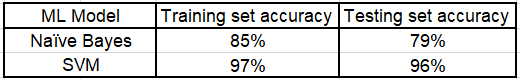

- From this we can infer that Naive bayes model have less accuracy but have       ability to generalize the testing dataset on other datasets as well. Thus       naive bayes model is more likely to predict earning manipulation more           accurately.
- Though, SVM algorithm have higher accuracy for predicting the earning           manipulation but higher accuracy does not always mean that the model will       always be predicting the correct value based on the dataset. generalisation     based on other datasets is also necessary.
- Thus, Using naive bayes algorithm for predicting earning manipulationis more   meaningful looking into the accuracy and the generalisation point of view.
